<a href="https://colab.research.google.com/github/sandeshinsights/nepali-laptop-price-prediction-webscraping/blob/main/nepali_laptop_price_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np

In [2]:
# Load the two CSV files
infotechs = pd.read_csv('/content/infotechs_laptop_prices.csv')
laptops = pd.read_csv('/content/laptops.csv')

In [3]:
infotechs.info()
infotechs.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 732 entries, 0 to 731
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Name         732 non-null    object
 1   Price (NPR)  732 non-null    int64 
 2   Product URL  732 non-null    object
dtypes: int64(1), object(2)
memory usage: 17.3+ KB


,Name,Price (NPR),Product URL
0,Dell Inspiron 5440 (Intel Core i5 13th Gen 133...,76999,https://infotechsnepal.com.np/product/dell-ins...
1,Asus Expertbook P1 P1403 (Intel Core i5 13th G...,79999,https://infotechsnepal.com.np/product/asus-exp...
2,Asus TUF Gaming F16 2025 (Intel Core i5 15th G...,146999,https://infotechsnepal.com.np/product/asus-tuf...
3,Asus ROG Strix G16 G614FM-WS94 (AMD Ryzen™ 9 9...,299000,https://infotechsnepal.com.np/product/asus-rog...
4,Lenovo IdeaPad Slim 3 2025 (Intel Core i5 13th...,71999,https://infotechsnepal.com.np/product/lenovo-i...


In [4]:
laptops.info()
laptops.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 720 entries, 0 to 719
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Product Title  720 non-null    object
 1   Product Price  720 non-null    object
dtypes: object(2)
memory usage: 11.4+ KB


,Product Title,Product Price
0,ASUS E410KA (Intel Celeron N4500 Processor | 4...,"रु35,000.00"
1,Lenovo IdeaPad 1i (Intel Celeron N4020 Process...,"रु29,999.00"
2,Asus Vivobook Go 14 (Intel Celeron N4020 Proce...,"रु29,999.00"
3,Lenovo V15-IGL (Intel Celeron N4020 Processor ...,"रु30,999.00"
4,Lenovo Ideapad 1 (Intel Celeron N4020 Processo...,"रु31,999.00"


In [5]:
infotechs = infotechs.drop(columns=['Product URL'])
infotechs.head()

,Name,Price (NPR)
0,Dell Inspiron 5440 (Intel Core i5 13th Gen 133...,76999
1,Asus Expertbook P1 P1403 (Intel Core i5 13th G...,79999
2,Asus TUF Gaming F16 2025 (Intel Core i5 15th G...,146999
3,Asus ROG Strix G16 G614FM-WS94 (AMD Ryzen™ 9 9...,299000
4,Lenovo IdeaPad Slim 3 2025 (Intel Core i5 13th...,71999


In [6]:
infotechs.columns

Index(['Name', 'Price (NPR)'], dtype='object')

In [7]:
# Rename columns for consistency
infotechs = infotechs.rename(columns={'Name': 'Title', 'Price (NPR)': 'Price'})
laptops = laptops.rename(columns={'Product Title': 'Title', 'Product Price': 'Price'})


In [8]:
infotechs.head()
#laptops.head()

,Title,Price
0,Dell Inspiron 5440 (Intel Core i5 13th Gen 133...,76999
1,Asus Expertbook P1 P1403 (Intel Core i5 13th G...,79999
2,Asus TUF Gaming F16 2025 (Intel Core i5 15th G...,146999
3,Asus ROG Strix G16 G614FM-WS94 (AMD Ryzen™ 9 9...,299000
4,Lenovo IdeaPad Slim 3 2025 (Intel Core i5 13th...,71999


In [9]:
# Merge (stack row-wise)
df = pd.concat([infotechs, laptops], ignore_index=True)

In [10]:
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1452 entries, 0 to 1451
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Title   1452 non-null   object
 1   Price   1452 non-null   object
dtypes: object(2)
memory usage: 22.8+ KB


,Title,Price
0,Dell Inspiron 5440 (Intel Core i5 13th Gen 133...,76999
1,Asus Expertbook P1 P1403 (Intel Core i5 13th G...,79999
2,Asus TUF Gaming F16 2025 (Intel Core i5 15th G...,146999
3,Asus ROG Strix G16 G614FM-WS94 (AMD Ryzen™ 9 9...,299000
4,Lenovo IdeaPad Slim 3 2025 (Intel Core i5 13th...,71999


In [11]:
df.sample(25)

,Title,Price
967,Lenovo Ideapad 1 (AMD Ryzen 3 7320U Processor ...,"रु40,999.00"
812,ASUS E410KA (Intel Celeron N4500 Processor | 4...,"रु35,000.00"
218,Dell Latitude 3540 (Intel Core i5 13th Gen 133...,96999
24,Lenovo LOQ 15 15IXA9 (Intel Core i5 12th Gen 1...,107999
847,Lenovo Ideapad 1 (AMD Ryzen 3 7320U Processor ...,"रु40,999.00"
677,HP Pavilion 14 Plus (Intel Core i5 12th Gen 12...,90000
442,HP Pavilion 15 (Intel Core i5 13th Gen 1335U P...,79999
608,HP Victus 15 (AMD Ryzen 5 7535HS Processor | 8...,87499
541,ASUS TUF Dash F15 FX517ZE (Intel Core i5 12th ...,119999
699,HP Pavilion 14 Plus (Intel Core i7 12th Gen 12...,116999


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1452 entries, 0 to 1451
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Title   1452 non-null   object
 1   Price   1452 non-null   object
dtypes: object(2)
memory usage: 22.8+ KB


In [13]:
df['Price'] = (
    df['Price']
    .astype(str)
    .str.replace(r'^रु\s*', '', regex=True)  # Remove 'रु' from beginning
    .str.replace(',', '')                   # Remove commas
    .astype(float)                          # Convert to float first
    .astype(int)                            # Then to int
)
df.sample(30)

,Title,Price
450,Acer Aspire 3 A314-42P-R8PQ (AMD Ryzen 7 5700U...,63999
1163,Lenovo V15 G2 IJL (Intel Celeron N4500 Process...,37499
928,Acer Aspire 3 14 ( Intel Core i3 13th Gen N305...,42999
1256,Lenovo Ideapad 1 (Intel Celeron N4020 Processo...,31999
1321,Acer Aspire Lite 15 (Intel Core Celeron N4500 ...,36899
318,Lenovo ThinkPad E14 Gen 5 (Intel Core i5 13th ...,132999
383,Acer Swift 3 14 (Intel Core i5 12th Gen 1240P ...,84999
1358,Dell Wyse 5470 Celeron (Intel Celeron N4100 Pr...,32499
22,HP Victus 15 (AMD Ryzen 7 8845HS Processor | 1...,144499
117,Apple MacBook Pro M4 Chip (10-core CPU | 10-co...,328500


In [14]:
# Step 1: Split at first '('
df[['laptop_title', 'specs']] = df['Title'].str.split('(', n=1, expand=True)

# Step 2: Split specs by '|'
specs_split = df['specs'].str.split('|', n=3, expand=True)

# Assign to new columns
df['processor'] = specs_split[0].str.strip()
df['ram'] = specs_split[1].str.strip()
df['storage'] = specs_split[2].str.strip()
df['rest'] = specs_split[3].str.replace(')', '', regex=False).str.strip()  # remove trailing ')'

# Drop intermediate 'Title' and 'specs' columns if needed
df = df.drop(columns=['Title', 'specs'])

# Reorder columns for clarity (optional)
df = df[['laptop_title', 'processor', 'ram', 'storage', 'rest', 'Price']]









In [15]:
df.head(51)

,laptop_title,processor,ram,storage,rest,Price
0,Dell Inspiron 5440,Intel Core i5 13th Gen 1334U Processor,16GB RAM,512GB SSD,"Backlit Keyboard | Intel UHD Graphics | 14"" FH...",76999
1,Asus Expertbook P1 P1403,Intel Core i5 13th Gen 13420H Processor,16GB RAM,512 GB SSD,"Intel UHD Graphics | FP Reader | 14"" FHD Display",79999
2,Asus TUF Gaming F16 2025,Intel Core i5 15th Gen 210H Processor,8GB RAM,512GB SSD,"NVIDIA GeForce RTX 3050 4GB Graphics | 16"" FHD...",146999
3,Asus ROG Strix G16 G614FM-WS94,AMD Ryzen™ 9 9955HX Processor,16 GB RAM,1TB SSD,NVIDIA® RTX 5060 8GB Graphics | RGB Backlit Ke...,299000
4,Lenovo IdeaPad Slim 3 2025,Intel Core i5 13th Gen 13420H Processor 16GB RAM,512GB SSD,Intel UHD Graphics,"Non Backlit Keyboard | 15.3"" WUXGA FHD+IPS Dis...",71999
5,Acer Nitro V15 Gaming,AMD Ryzen 5 7235HS Processor,8GB RAM,512GB SSD,NVIDIA GeForce RTX 3050 6GB Graphics | White B...,97999
6,Lenovo LOQ 15 Gaming,AMD Ryzen 7 8845HS Processor,16GB RAM,512GB SSD,"NVIDIA GeForce RTX 4050 6GB Graphics | 15.6"" F...",140999
7,Lenovo LOQ 15 15AHP9,AMD Ryzen 5 8645HS Processor,16GB RAM,512GB SSD,"NVIDIA GeForce RTX 4050 6GB Graphics | 15.6"" F...",123999
8,Lenovo Legion 5 15 Gaming 2025,AMD Ryzen 7 260 Processor,16GB RAM,512GB SSD,NVIDIA® GeForce RTX 5060 8GB Graphics | RGB Ba...,350000
9,Lenovo Legion 5 15,Intel Core Ultra 7 15th Gen 255HK Processor,24GB RAM,1TB SSD,NVIDIA GeForce RTX 5060 Graphics | 15.1″ WQXGA...,259999


In [16]:
# Keep rows where 'ram' contains 'RAM' or 'DDR4'
df = df[df['ram'].str.contains('RAM|DDR4', case=False, na=False)]

# Keep rows where 'storage' contains 'SSD'
df = df[df['storage'].str.contains('SSD', case=False, na=False)]

# Reset index after filtering
df = df.reset_index(drop=True)

# View result
df.head()


,laptop_title,processor,ram,storage,rest,Price
0,Dell Inspiron 5440,Intel Core i5 13th Gen 1334U Processor,16GB RAM,512GB SSD,"Backlit Keyboard | Intel UHD Graphics | 14"" FH...",76999
1,Asus Expertbook P1 P1403,Intel Core i5 13th Gen 13420H Processor,16GB RAM,512 GB SSD,"Intel UHD Graphics | FP Reader | 14"" FHD Display",79999
2,Asus TUF Gaming F16 2025,Intel Core i5 15th Gen 210H Processor,8GB RAM,512GB SSD,"NVIDIA GeForce RTX 3050 4GB Graphics | 16"" FHD...",146999
3,Asus ROG Strix G16 G614FM-WS94,AMD Ryzen™ 9 9955HX Processor,16 GB RAM,1TB SSD,NVIDIA® RTX 5060 8GB Graphics | RGB Backlit Ke...,299000
4,Acer Nitro V15 Gaming,AMD Ryzen 5 7235HS Processor,8GB RAM,512GB SSD,NVIDIA GeForce RTX 3050 6GB Graphics | White B...,97999


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1378 entries, 0 to 1377
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   laptop_title  1378 non-null   object
 1   processor     1378 non-null   object
 2   ram           1378 non-null   object
 3   storage       1378 non-null   object
 4   rest          1378 non-null   object
 5   Price         1378 non-null   int64 
dtypes: int64(1), object(5)
memory usage: 64.7+ KB


In [18]:
df.head(50)

,laptop_title,processor,ram,storage,rest,Price
0,Dell Inspiron 5440,Intel Core i5 13th Gen 1334U Processor,16GB RAM,512GB SSD,"Backlit Keyboard | Intel UHD Graphics | 14"" FH...",76999
1,Asus Expertbook P1 P1403,Intel Core i5 13th Gen 13420H Processor,16GB RAM,512 GB SSD,"Intel UHD Graphics | FP Reader | 14"" FHD Display",79999
2,Asus TUF Gaming F16 2025,Intel Core i5 15th Gen 210H Processor,8GB RAM,512GB SSD,"NVIDIA GeForce RTX 3050 4GB Graphics | 16"" FHD...",146999
3,Asus ROG Strix G16 G614FM-WS94,AMD Ryzen™ 9 9955HX Processor,16 GB RAM,1TB SSD,NVIDIA® RTX 5060 8GB Graphics | RGB Backlit Ke...,299000
4,Acer Nitro V15 Gaming,AMD Ryzen 5 7235HS Processor,8GB RAM,512GB SSD,NVIDIA GeForce RTX 3050 6GB Graphics | White B...,97999
5,Lenovo LOQ 15 Gaming,AMD Ryzen 7 8845HS Processor,16GB RAM,512GB SSD,"NVIDIA GeForce RTX 4050 6GB Graphics | 15.6"" F...",140999
6,Lenovo LOQ 15 15AHP9,AMD Ryzen 5 8645HS Processor,16GB RAM,512GB SSD,"NVIDIA GeForce RTX 4050 6GB Graphics | 15.6"" F...",123999
7,Lenovo Legion 5 15 Gaming 2025,AMD Ryzen 7 260 Processor,16GB RAM,512GB SSD,NVIDIA® GeForce RTX 5060 8GB Graphics | RGB Ba...,350000
8,Lenovo Legion 5 15,Intel Core Ultra 7 15th Gen 255HK Processor,24GB RAM,1TB SSD,NVIDIA GeForce RTX 5060 Graphics | 15.1″ WQXGA...,259999
9,Asus VivoBook 14,Intel Core i5 13th Gen 1334U Processor,16GB RAM,512GB SSD,"Magic Numpad | Intel UHD Graphics | 14"" FHD Di...",73999


In [19]:
def extract_graphics_display(rest):
    if pd.isna(rest):
        return pd.Series([None, None, None])

    parts = [part.strip() for part in rest.split('|')]
    graphics = None
    display = None
    remaining_parts = []

    for part in parts:
        if 'graphics' in part.lower():
            graphics = part
        elif 'display' in part.lower():
            display = part
        else:
            remaining_parts.append(part)

    new_rest = ' | '.join(remaining_parts)
    return pd.Series([graphics, display, new_rest])

df[['graphics', 'display', 'rest']] = df['rest'].apply(extract_graphics_display)


In [20]:
df.head()

,laptop_title,processor,ram,storage,rest,Price,graphics,display
0,Dell Inspiron 5440,Intel Core i5 13th Gen 1334U Processor,16GB RAM,512GB SSD,Backlit Keyboard,76999,Intel UHD Graphics,"14"" FHD+ IPS Display"
1,Asus Expertbook P1 P1403,Intel Core i5 13th Gen 13420H Processor,16GB RAM,512 GB SSD,FP Reader,79999,Intel UHD Graphics,"14"" FHD Display"
2,Asus TUF Gaming F16 2025,Intel Core i5 15th Gen 210H Processor,8GB RAM,512GB SSD,2 Years Int'l Warranty | 1 Year Perfect Warranty,146999,NVIDIA GeForce RTX 3050 4GB Graphics,"16"" FHD WUXGA 144HZ Display"
3,Asus ROG Strix G16 G614FM-WS94,AMD Ryzen™ 9 9955HX Processor,16 GB RAM,1TB SSD,RGB Backlit Keyboard,299000,NVIDIA® RTX 5060 8GB Graphics,"16"" FHD+ 165HZ Display"
4,Acer Nitro V15 Gaming,AMD Ryzen 5 7235HS Processor,8GB RAM,512GB SSD,White Backlit Keyboard | FP Reader,97999,NVIDIA GeForce RTX 3050 6GB Graphics,"15.6"" FHD IPS 165Hz Display"


In [21]:
df = df.dropna(subset=['ram'])
df = df.dropna(subset=['storage'])


In [22]:
df.head()

,laptop_title,processor,ram,storage,rest,Price,graphics,display
0,Dell Inspiron 5440,Intel Core i5 13th Gen 1334U Processor,16GB RAM,512GB SSD,Backlit Keyboard,76999,Intel UHD Graphics,"14"" FHD+ IPS Display"
1,Asus Expertbook P1 P1403,Intel Core i5 13th Gen 13420H Processor,16GB RAM,512 GB SSD,FP Reader,79999,Intel UHD Graphics,"14"" FHD Display"
2,Asus TUF Gaming F16 2025,Intel Core i5 15th Gen 210H Processor,8GB RAM,512GB SSD,2 Years Int'l Warranty | 1 Year Perfect Warranty,146999,NVIDIA GeForce RTX 3050 4GB Graphics,"16"" FHD WUXGA 144HZ Display"
3,Asus ROG Strix G16 G614FM-WS94,AMD Ryzen™ 9 9955HX Processor,16 GB RAM,1TB SSD,RGB Backlit Keyboard,299000,NVIDIA® RTX 5060 8GB Graphics,"16"" FHD+ 165HZ Display"
4,Acer Nitro V15 Gaming,AMD Ryzen 5 7235HS Processor,8GB RAM,512GB SSD,White Backlit Keyboard | FP Reader,97999,NVIDIA GeForce RTX 3050 6GB Graphics,"15.6"" FHD IPS 165Hz Display"


In [23]:
df.head()

,laptop_title,processor,ram,storage,rest,Price,graphics,display
0,Dell Inspiron 5440,Intel Core i5 13th Gen 1334U Processor,16GB RAM,512GB SSD,Backlit Keyboard,76999,Intel UHD Graphics,"14"" FHD+ IPS Display"
1,Asus Expertbook P1 P1403,Intel Core i5 13th Gen 13420H Processor,16GB RAM,512 GB SSD,FP Reader,79999,Intel UHD Graphics,"14"" FHD Display"
2,Asus TUF Gaming F16 2025,Intel Core i5 15th Gen 210H Processor,8GB RAM,512GB SSD,2 Years Int'l Warranty | 1 Year Perfect Warranty,146999,NVIDIA GeForce RTX 3050 4GB Graphics,"16"" FHD WUXGA 144HZ Display"
3,Asus ROG Strix G16 G614FM-WS94,AMD Ryzen™ 9 9955HX Processor,16 GB RAM,1TB SSD,RGB Backlit Keyboard,299000,NVIDIA® RTX 5060 8GB Graphics,"16"" FHD+ 165HZ Display"
4,Acer Nitro V15 Gaming,AMD Ryzen 5 7235HS Processor,8GB RAM,512GB SSD,White Backlit Keyboard | FP Reader,97999,NVIDIA GeForce RTX 3050 6GB Graphics,"15.6"" FHD IPS 165Hz Display"


In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1378 entries, 0 to 1377
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   laptop_title  1378 non-null   object
 1   processor     1378 non-null   object
 2   ram           1378 non-null   object
 3   storage       1378 non-null   object
 4   rest          1378 non-null   object
 5   Price         1378 non-null   int64 
 6   graphics      1252 non-null   object
 7   display       1374 non-null   object
dtypes: int64(1), object(7)
memory usage: 86.3+ KB


In [25]:
df.head()

,laptop_title,processor,ram,storage,rest,Price,graphics,display
0,Dell Inspiron 5440,Intel Core i5 13th Gen 1334U Processor,16GB RAM,512GB SSD,Backlit Keyboard,76999,Intel UHD Graphics,"14"" FHD+ IPS Display"
1,Asus Expertbook P1 P1403,Intel Core i5 13th Gen 13420H Processor,16GB RAM,512 GB SSD,FP Reader,79999,Intel UHD Graphics,"14"" FHD Display"
2,Asus TUF Gaming F16 2025,Intel Core i5 15th Gen 210H Processor,8GB RAM,512GB SSD,2 Years Int'l Warranty | 1 Year Perfect Warranty,146999,NVIDIA GeForce RTX 3050 4GB Graphics,"16"" FHD WUXGA 144HZ Display"
3,Asus ROG Strix G16 G614FM-WS94,AMD Ryzen™ 9 9955HX Processor,16 GB RAM,1TB SSD,RGB Backlit Keyboard,299000,NVIDIA® RTX 5060 8GB Graphics,"16"" FHD+ 165HZ Display"
4,Acer Nitro V15 Gaming,AMD Ryzen 5 7235HS Processor,8GB RAM,512GB SSD,White Backlit Keyboard | FP Reader,97999,NVIDIA GeForce RTX 3050 6GB Graphics,"15.6"" FHD IPS 165Hz Display"


In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1378 entries, 0 to 1377
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   laptop_title  1378 non-null   object
 1   processor     1378 non-null   object
 2   ram           1378 non-null   object
 3   storage       1378 non-null   object
 4   rest          1378 non-null   object
 5   Price         1378 non-null   int64 
 6   graphics      1252 non-null   object
 7   display       1374 non-null   object
dtypes: int64(1), object(7)
memory usage: 86.3+ KB


In [27]:
import seaborn as sns

In [28]:
df.insert(
    1,
    'Variant',
    df['processor'].apply(
        lambda x: (
            "H" if 'H' in x else
            "U" if 'U' in x else
            "Intel Celeron" if 'Celeron' in x else
            "Other"
        )
    )
)


In [29]:
df.head()

,laptop_title,Variant,processor,ram,storage,rest,Price,graphics,display
0,Dell Inspiron 5440,U,Intel Core i5 13th Gen 1334U Processor,16GB RAM,512GB SSD,Backlit Keyboard,76999,Intel UHD Graphics,"14"" FHD+ IPS Display"
1,Asus Expertbook P1 P1403,H,Intel Core i5 13th Gen 13420H Processor,16GB RAM,512 GB SSD,FP Reader,79999,Intel UHD Graphics,"14"" FHD Display"
2,Asus TUF Gaming F16 2025,H,Intel Core i5 15th Gen 210H Processor,8GB RAM,512GB SSD,2 Years Int'l Warranty | 1 Year Perfect Warranty,146999,NVIDIA GeForce RTX 3050 4GB Graphics,"16"" FHD WUXGA 144HZ Display"
3,Asus ROG Strix G16 G614FM-WS94,H,AMD Ryzen™ 9 9955HX Processor,16 GB RAM,1TB SSD,RGB Backlit Keyboard,299000,NVIDIA® RTX 5060 8GB Graphics,"16"" FHD+ 165HZ Display"
4,Acer Nitro V15 Gaming,H,AMD Ryzen 5 7235HS Processor,8GB RAM,512GB SSD,White Backlit Keyboard | FP Reader,97999,NVIDIA GeForce RTX 3050 6GB Graphics,"15.6"" FHD IPS 165Hz Display"


In [30]:
import re

# Function to extract RAM number (first number only)
def extract_ram(text):
    if pd.isna(text):
        return None
    match = re.search(r'\d+', str(text))
    return int(match.group()) if match else None

# Function to extract Storage numbers and sum them, converting TB to GB
def extract_storage(text):
    if pd.isna(text):
        return None
    text = str(text).upper()
    parts = text.split('+')
    total_gb = 0
    for part in parts:
        match = re.search(r'(\d+)\s*(TB|GB)?', part.strip())
        if match:
            number = int(match.group(1))
            unit = match.group(2)
            if unit == 'TB':
                number *= 1024
            total_gb += number
    return total_gb if total_gb > 0 else None

# Apply to dataframe
df['ram'] = df['ram'].apply(extract_ram)
df['storage'] = df['storage'].apply(extract_storage)

print(df[['ram', 'storage']])


      ram  storage
0      16      512
1      16      512
2       8      512
3      16     1024
4       8      512
...   ...      ...
1373    4      256
1374    8      256
1375    8      256
1376    8      256
1377    8      512

[1378 rows x 2 columns]


In [31]:
df.head(291)

,laptop_title,Variant,processor,ram,storage,rest,Price,graphics,display
0,Dell Inspiron 5440,U,Intel Core i5 13th Gen 1334U Processor,16,512,Backlit Keyboard,76999,Intel UHD Graphics,"14"" FHD+ IPS Display"
1,Asus Expertbook P1 P1403,H,Intel Core i5 13th Gen 13420H Processor,16,512,FP Reader,79999,Intel UHD Graphics,"14"" FHD Display"
2,Asus TUF Gaming F16 2025,H,Intel Core i5 15th Gen 210H Processor,8,512,2 Years Int'l Warranty | 1 Year Perfect Warranty,146999,NVIDIA GeForce RTX 3050 4GB Graphics,"16"" FHD WUXGA 144HZ Display"
3,Asus ROG Strix G16 G614FM-WS94,H,AMD Ryzen™ 9 9955HX Processor,16,1024,RGB Backlit Keyboard,299000,NVIDIA® RTX 5060 8GB Graphics,"16"" FHD+ 165HZ Display"
4,Acer Nitro V15 Gaming,H,AMD Ryzen 5 7235HS Processor,8,512,White Backlit Keyboard | FP Reader,97999,NVIDIA GeForce RTX 3050 6GB Graphics,"15.6"" FHD IPS 165Hz Display"
...,...,...,...,...,...,...,...,...,...
286,Acer Nitro V,H,Intel Core i5 13th gen 13420H Processor,8,512,Backlit Keyboard,122999,Nvidia GeForce RTX 4060 8GB Dedicated Graphics,15.6″ FHD 144Hz Display
287,Lenovo Thinkpad P14s Gen,Other,Intel Core i7 12th Gen 1260P Processor,16,512,,139000,Intel UHD Graphics,14” FHD Display
288,Lenovo ThinkPad T14 Gen 4,U,Intel Core i5 13th Gen 1345U Processor,16,512,,149999,Intel UHD Graphics,14” FHD Display
289,Asus VivoBook,H,Intel Core i5 13th gen 13500H Processor,8,512,,77000,Intel Iris Xᵉ Graphics,16″ WUXGA FHD Display


In [32]:
def split_display(text):
    if pd.isna(text):
        return None, None
    match = re.search(r'[\d\.]+', str(text))
    if match:
        size = float(match.group())
        remaining = str(text).replace(match.group(), '').strip()
        return size, remaining
    else:
        return None, text.strip()

df[['screensize', 'display']] = df['display'].apply(lambda x: pd.Series(split_display(x)))

print(df[['screensize', 'display']])


      screensize                               display
0           14.0                    " FHD+ IPS Display
1           14.0                         " FHD Display
2           16.0             " FHD WUXGA 144HZ Display
3           16.0                    " FHD+ 5HZ Display
4           15.6               " FHD IPS 165Hz Display
...          ...                                   ...
1373        15.6                         '' HD Display
1374        14.0  ” FHD Acer ComfyView LED LCD Display
1375        15.6                     -inch FHD Display
1376        14.0                          " HD Display
1377        15.6              " Anti-Glare FHD Display

[1378 rows x 2 columns]


In [33]:
df.head(1376)

,laptop_title,Variant,processor,ram,storage,rest,Price,graphics,display,screensize
0,Dell Inspiron 5440,U,Intel Core i5 13th Gen 1334U Processor,16,512,Backlit Keyboard,76999,Intel UHD Graphics,""" FHD+ IPS Display",14.0
1,Asus Expertbook P1 P1403,H,Intel Core i5 13th Gen 13420H Processor,16,512,FP Reader,79999,Intel UHD Graphics,""" FHD Display",14.0
2,Asus TUF Gaming F16 2025,H,Intel Core i5 15th Gen 210H Processor,8,512,2 Years Int'l Warranty | 1 Year Perfect Warranty,146999,NVIDIA GeForce RTX 3050 4GB Graphics,""" FHD WUXGA 144HZ Display",16.0
3,Asus ROG Strix G16 G614FM-WS94,H,AMD Ryzen™ 9 9955HX Processor,16,1024,RGB Backlit Keyboard,299000,NVIDIA® RTX 5060 8GB Graphics,""" FHD+ 5HZ Display",16.0
4,Acer Nitro V15 Gaming,H,AMD Ryzen 5 7235HS Processor,8,512,White Backlit Keyboard | FP Reader,97999,NVIDIA GeForce RTX 3050 6GB Graphics,""" FHD IPS 165Hz Display",15.6
...,...,...,...,...,...,...,...,...,...,...
1371,Asus VivoBook Go 14,U,AMD Ryzen 3 7320U Processor,4,256,,37499,AMD Radeon Graphics,""" FHD Display",14.0
1372,Acer Aspire 3,U,AMD Ryzen 3 7320U Processor,4,256,,39499,AMD Radeon Graphics,""" FHD Display",15.6
1373,Lenovo Ideapad 1,U,AMD Ryzen 3 7320U Processor,4,256,,40999,AMD Radeon Graphics,'' HD Display,15.6
1374,Acer Aspire 3 14,Other,Intel Core i3 13th Gen N305 Processor,8,256,,42999,Intel UHD Graphics,” FHD Acer ComfyView LED LCD Display,14.0


In [34]:
# Extract first word as company and convert to title case
df['company'] = df['laptop_title'].str.split().str[0].str.title()

print(df[['laptop_title', 'company']])

                         laptop_title company
0                 Dell Inspiron 5440     Dell
1           Asus Expertbook P1 P1403     Asus
2           Asus TUF Gaming F16 2025     Asus
3     Asus ROG Strix G16 G614FM-WS94     Asus
4              Acer Nitro V15 Gaming     Acer
...                               ...     ...
1373                Lenovo Ideapad 1   Lenovo
1374                Acer Aspire 3 14     Acer
1375             Dell Vostro 15 3520     Dell
1376               Lenovo IdeaPad 1i   Lenovo
1377       Acer Aspire 3 SlimBook 15     Acer

[1378 rows x 2 columns]


In [35]:
df = df.drop(columns=['laptop_title'])
df = df.drop(columns=['rest'])




In [36]:
import re

# Function to extract a single processor feature
def processor_feature(text):
    text_clean = re.sub(r'[^\w\s]', '', str(text))  # remove special characters

    # 1️⃣ Check for Intel Celeron first
    if re.search(r'Celeron', text_clean, re.IGNORECASE):
        return "Celeron_0"

    # 2️⃣ Extract generation (look for 'Gen' anywhere)
    match_gen = re.search(r'(\d{1,2})(st|nd|rd|th)?\s*Gen', text_clean, re.IGNORECASE)
    generation = int(match_gen.group(1)) if match_gen else 0

    # 3️⃣ Extract Intel series: i3/i5/i7/i9 anywhere in the text
    match_series = re.search(r'\bi[3579]\b', text_clean, re.IGNORECASE)
    if match_series:
        series = match_series.group().upper()
    else:
        # 4️⃣ Extract AMD Ryzen series
        match_ryzen = re.search(r'Ryzen\s*\d', text_clean, re.IGNORECASE)
        series = match_ryzen.group().replace(' ', '') if match_ryzen else 'Other'
        # 5️⃣ If AMD and generation not found, extract from model number
        if generation == 0:
            words = text_clean.split()
            model_word = words[-2] if len(words) >= 2 else ''
            match_model = re.search(r'(\d)', model_word)
            generation = int(match_model.group(1)) if match_model else 0

    # 6️⃣ Combine series and generation into one column
    return f"{series}_{generation}"

# Apply the function to the entire dataframe
df['processor_feature'] = df['processor'].apply(processor_feature)

# Optional: check first 10 rows
print(df[['processor', 'processor_feature']].head(10))


                                     processor processor_feature
0       Intel Core i5 13th Gen 1334U Processor             I5_13
1      Intel Core i5 13th Gen 13420H Processor             I5_13
2        Intel Core i5 15th Gen 210H Processor             I5_15
3                AMD Ryzen™ 9 9955HX Processor          Ryzen9_9
4                 AMD Ryzen 5 7235HS Processor          Ryzen5_7
5                 AMD Ryzen 7 8845HS Processor          Ryzen7_8
6                 AMD Ryzen 5 8645HS Processor          Ryzen5_8
7                    AMD Ryzen 7 260 Processor          Ryzen7_2
8  Intel Core Ultra 7 15th Gen 255HK Processor          Other_15
9       Intel Core i5 13th Gen 1334U Processor             I5_13


In [37]:
df.sample(30)

,Variant,processor,ram,storage,Price,graphics,display,screensize,company,processor_feature
1233,U,AMD Ryzen 3 7320U Processor,4,256,40999,AMD Radeon Graphics,'' HD Display,15.6,Lenovo,Ryzen3_7
809,Intel Celeron,Intel Celeron N4500 Processor,8,256,37499,Intel UHD Graphics,""" FHD Display",15.6,Lenovo,Celeron_0
1140,Intel Celeron,Intel Celeron N4020 Processor,4,256,29999,Intel UHD Graphics,""" FHD Display",14.0,Asus,Celeron_0
604,H,Intel Core i5 13th Gen 13420H Processor,8,512,103999,NVIDIA® GeForce RTX™ 3050 6GB Dedicated Graphics,""" FHD 144Hz Display",15.6,Hp,I5_13
825,Intel Celeron,Intel Celeron N4500 Processor,8,256,34799,None,""" Anti Glare FHD Display",15.6,Acer,Celeron_0
133,U,Intel Core i3 13th Gen 1315U Processor,8,256,50999,Intel® UHD Graphics,""" FHD Anti-glare Display",14.0,Lenovo,I3_13
245,U,AMD Ryzen 5 7430U Processor,16,512,79999,AMD Radeon Graphics,” FHD IPS Display,14.0,Acer,Ryzen5_7
664,Intel Celeron,Intel Celeron N4100 Processor,8,256,32499,Intel UHD Graphics,""" FHD Display",14.0,Dell,Celeron_0
833,U,AMD Ryzen 3 7320U Processor,4,256,40999,AMD Radeon Graphics,'' HD Display,15.6,Lenovo,Ryzen3_7
951,U,AMD Ryzen 3 7320U Processor,4,256,37499,AMD Radeon Graphics,""" FHD Display",14.0,Asus,Ryzen3_7


In [38]:
import re

# Function to extract processor brand
def processor_brand(text):
    text_clean = str(text)

    if re.search(r'Intel', text_clean, re.IGNORECASE):
        return "Intel"
    elif re.search(r'Ryzen|AMD', text_clean, re.IGNORECASE):
        return "AMD"
    else:
        return "Other"

# Apply to dataframe
df['processor_brand'] = df['processor'].apply(processor_brand)

# Check the first few rows
print(df[['processor', 'processor_brand']].head(10))


                                     processor processor_brand
0       Intel Core i5 13th Gen 1334U Processor           Intel
1      Intel Core i5 13th Gen 13420H Processor           Intel
2        Intel Core i5 15th Gen 210H Processor           Intel
3                AMD Ryzen™ 9 9955HX Processor             AMD
4                 AMD Ryzen 5 7235HS Processor             AMD
5                 AMD Ryzen 7 8845HS Processor             AMD
6                 AMD Ryzen 5 8645HS Processor             AMD
7                    AMD Ryzen 7 260 Processor             AMD
8  Intel Core Ultra 7 15th Gen 255HK Processor           Intel
9       Intel Core i5 13th Gen 1334U Processor           Intel


In [39]:
df.sample(30)

,Variant,processor,ram,storage,Price,graphics,display,screensize,company,processor_feature,processor_brand
206,H,Intel Core i5-13450HX Processor,16,512,119999,NVIDIA GeForce RTX 4050 6GB Graphics,″ FHD IPS 144HZ Display,15.6,Lenovo,Other_5,Intel
1142,Intel Celeron,Intel Celeron N4020 Processor,4,256,31999,Intel UHD Graphics,'' HD Display,15.6,Lenovo,Celeron_0,Intel
412,Other,Intel Core i7 12th Gen 1260P Processor,16,1024,126000,Intel Iris Xe Graphics,""" IPS Display",14.0,Acer,I7_12,Intel
5,H,AMD Ryzen 7 8845HS Processor,16,512,140999,NVIDIA GeForce RTX 4050 6GB Graphics,""" FHD 144Hz 100% sRGB IPS Display",15.6,Lenovo,Ryzen7_8,AMD
723,Intel Celeron,Intel Celeron N4500 Processor,4,256,32000,Intel UHD Graphics,""" HD Display",14.0,Lenovo,Celeron_0,Intel
800,Intel Celeron,Intel Celeron N4020 Processor,4,256,29999,Intel UHD Graphics,""" FHD Display",14.0,Asus,Celeron_0,Intel
1024,Intel Celeron,Intel Celeron N4100 Processor,8,256,32499,Intel UHD Graphics,""" FHD Display",14.0,Dell,Celeron_0,Intel
1,H,Intel Core i5 13th Gen 13420H Processor,16,512,79999,Intel UHD Graphics,""" FHD Display",14.0,Asus,I5_13,Intel
985,Intel Celeron,Intel Celeron N4500 Processor,8,256,34799,None,""" Anti Glare FHD Display",15.6,Acer,Celeron_0,Intel
1307,Intel Celeron,Intel Core Celeron N4500 Processor,8,256,36899,Intel UHD Graphics,""" FHD IPS Slim Bezel Display",15.6,Acer,Celeron_0,Intel


In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1378 entries, 0 to 1377
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Variant            1378 non-null   object 
 1   processor          1378 non-null   object 
 2   ram                1378 non-null   int64  
 3   storage            1378 non-null   int64  
 4   Price              1378 non-null   int64  
 5   graphics           1252 non-null   object 
 6   display            1374 non-null   object 
 7   screensize         1374 non-null   float64
 8   company            1378 non-null   object 
 9   processor_feature  1378 non-null   object 
 10  processor_brand    1378 non-null   object 
dtypes: float64(1), int64(3), object(7)
memory usage: 118.6+ KB


In [41]:
import pandas as pd
import re

# Function to clean text
def clean_display(text):
    text = str(text).upper()
    # Remove quotes and extra spaces
    text = re.sub(r'[”″"-]', '', text)
    text = re.sub(r'\s+', ' ', text).strip()
    return text

# Function to categorize display
def display_type(text):
    text = clean_display(text)

    if 'FHD' in text:
        return 'FHD'
    elif 'WQXGA' in text:
        return 'WQXGA'
    elif 'WUXGA' in text:
        return 'WUXGA'
    elif '2.8K' in text or '2.2K' in text or '2K' in text:
        return '2K'
    elif '3K' in text:
        return '3K'
    elif 'UHD' in text or 'OLED' in text:
        return 'UHD_OLED'
    elif 'HD' in text:
        return 'HD'
    else:
        return 'Other'

# Apply to your dataframe
df['display_type'] = df['display'].apply(display_type)

# Optional: drop raw display column
# df = df.drop(columns=['display'])

# Check distribution
print(df['display_type'].value_counts())


display_type
FHD         987
HD          231
WUXGA        63
Other        32
2K           31
WQXGA        23
UHD_OLED      6
3K            5
Name: count, dtype: int64


In [42]:
import pandas as pd

# Function to clean and standardize graphics strings
def clean_graphics(text):
    if not isinstance(text, str):
        return ''
    text = text.upper().replace('®','').replace('™','').strip()
    return text

#Function to extract graphic_brand
def graphics_brand_extract(x):
    x = str(x).lower()
    if 'nvidia' in x or 'geforce' in x or 'rtx' in x:
        return 'NVIDIA'
    elif 'intel' in x:
        return 'Intel'
    elif 'amd' in x or 'radeon' in x:
        return 'AMD'
    else:
        return 'Other'

# Function to classify graphics type
def graphics_type(text):
    text = clean_graphics(text)

    # Intel or AMD generic graphics -> Integrated
    if 'INTEL' in text or 'AMD' in text:
        if any(keyword in text for keyword in ['DEDICATED', 'RTX', 'GEFORCE']):
            return 'Dedicated'
        else:
            return 'Integrated'
    # NVIDIA: usually dedicated
    elif 'NVIDIA' in text or 'GEFORCE' in text or 'RTX' in text:
        return 'Dedicated'
    else:
        return 'Other'

# Apply the function to the 'graphics' column of your full dataframe
df['graphics_brand'] = df['graphics'].apply(graphics_brand_extract)

df['graphics_type'] = df['graphics'].apply(graphics_type)

# Display the first few rows to check
print(df[['graphics_brand', 'graphics_type']].head())




  graphics_brand graphics_type
0          Intel    Integrated
1          Intel    Integrated
2         NVIDIA     Dedicated
3         NVIDIA     Dedicated
4         NVIDIA     Dedicated


In [43]:
df.head(50)

,Variant,processor,ram,storage,Price,graphics,display,screensize,company,processor_feature,processor_brand,display_type,graphics_brand,graphics_type
0,U,Intel Core i5 13th Gen 1334U Processor,16,512,76999,Intel UHD Graphics,""" FHD+ IPS Display",14.0,Dell,I5_13,Intel,FHD,Intel,Integrated
1,H,Intel Core i5 13th Gen 13420H Processor,16,512,79999,Intel UHD Graphics,""" FHD Display",14.0,Asus,I5_13,Intel,FHD,Intel,Integrated
2,H,Intel Core i5 15th Gen 210H Processor,8,512,146999,NVIDIA GeForce RTX 3050 4GB Graphics,""" FHD WUXGA 144HZ Display",16.0,Asus,I5_15,Intel,FHD,NVIDIA,Dedicated
3,H,AMD Ryzen™ 9 9955HX Processor,16,1024,299000,NVIDIA® RTX 5060 8GB Graphics,""" FHD+ 5HZ Display",16.0,Asus,Ryzen9_9,AMD,FHD,NVIDIA,Dedicated
4,H,AMD Ryzen 5 7235HS Processor,8,512,97999,NVIDIA GeForce RTX 3050 6GB Graphics,""" FHD IPS 165Hz Display",15.6,Acer,Ryzen5_7,AMD,FHD,NVIDIA,Dedicated
5,H,AMD Ryzen 7 8845HS Processor,16,512,140999,NVIDIA GeForce RTX 4050 6GB Graphics,""" FHD 144Hz 100% sRGB IPS Display",15.6,Lenovo,Ryzen7_8,AMD,FHD,NVIDIA,Dedicated
6,H,AMD Ryzen 5 8645HS Processor,16,512,123999,NVIDIA GeForce RTX 4050 6GB Graphics,""" FHD 144Hz 100% sRGB IPS Display",15.6,Lenovo,Ryzen5_8,AMD,FHD,NVIDIA,Dedicated
7,Other,AMD Ryzen 7 260 Processor,16,512,350000,NVIDIA® GeForce RTX 5060 8GB Graphics,""" OLED 165HZ Display",15.1,Lenovo,Ryzen7_2,AMD,UHD_OLED,NVIDIA,Dedicated
8,H,Intel Core Ultra 7 15th Gen 255HK Processor,24,1024,259999,NVIDIA GeForce RTX 5060 Graphics,″ WQXGA 165Hz Display,15.1,Lenovo,Other_15,Intel,WQXGA,NVIDIA,Dedicated
9,U,Intel Core i5 13th Gen 1334U Processor,16,512,73999,Intel UHD Graphics,""" FHD Display",14.0,Asus,I5_13,Intel,FHD,Intel,Integrated


In [44]:
print(df['graphics_brand'].value_counts())
print(df['graphics_type'].value_counts())

graphics_brand
Intel     796
AMD       235
NVIDIA    199
Other     148
Name: count, dtype: int64
graphics_type
Integrated    1029
Dedicated      199
Other          150
Name: count, dtype: int64


In [45]:
df = df.drop(columns=['processor'])
df = df.drop(columns=['display'])
df = df.drop(columns=['graphics'])



In [46]:
df.head()

,Variant,ram,storage,Price,screensize,company,processor_feature,processor_brand,display_type,graphics_brand,graphics_type
0,U,16,512,76999,14.0,Dell,I5_13,Intel,FHD,Intel,Integrated
1,H,16,512,79999,14.0,Asus,I5_13,Intel,FHD,Intel,Integrated
2,H,8,512,146999,16.0,Asus,I5_15,Intel,FHD,NVIDIA,Dedicated
3,H,16,1024,299000,16.0,Asus,Ryzen9_9,AMD,FHD,NVIDIA,Dedicated
4,H,8,512,97999,15.6,Acer,Ryzen5_7,AMD,FHD,NVIDIA,Dedicated


In [47]:
import seaborn as sns
import matplotlib.pyplot as plt

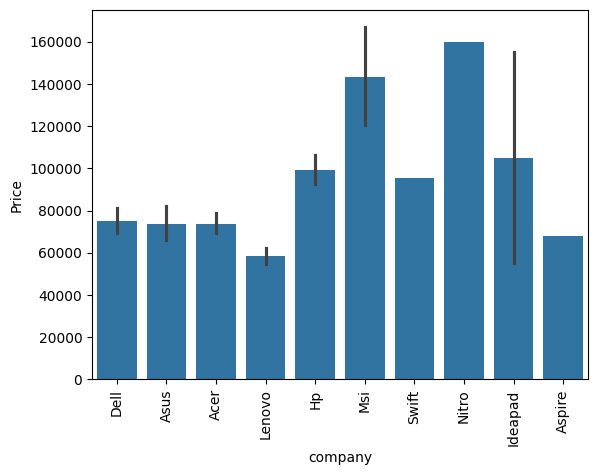

In [48]:
sns.barplot(x=df['company'],y=df['Price'])
plt.xticks(rotation='vertical')
plt.show()

In [49]:
df['company'].value_counts()

,count
company,
Lenovo,525
Acer,352
Asus,215
Dell,171
Hp,95
Msi,15
Ideapad,2
Swift,1
Nitro,1


In [50]:
model_to_company = {
    "Ideapad": "Lenovo",
    "IdeaPad": "Lenovo",   # sometimes capitalization differs
    "Swift": "Acer",
    "Nitro": "Acer",
    "Aspire": "Acer"
}

# Replace company column values
df["company"] = df["company"].replace(model_to_company)

# Check result
print(df["company"].value_counts())

company
Lenovo    527
Acer      355
Asus      215
Dell      171
Hp         95
Msi        15
Name: count, dtype: int64


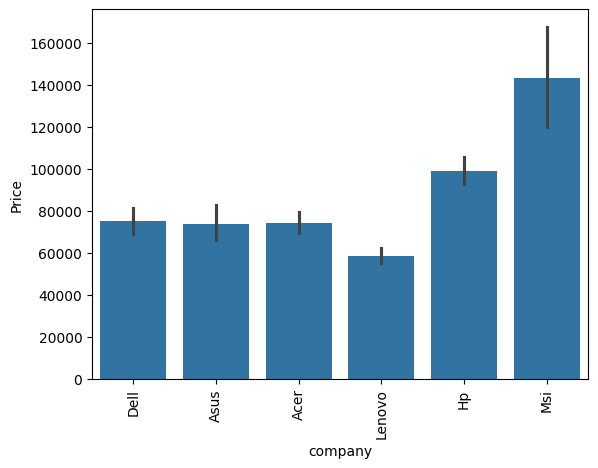

In [51]:
sns.barplot(x=df['company'],y=df['Price'])
plt.xticks(rotation='vertical')
plt.show()

/tmp/ipython-input-3556049916.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(np.log(df['Price']))


<Axes: xlabel='Price', ylabel='Density'>

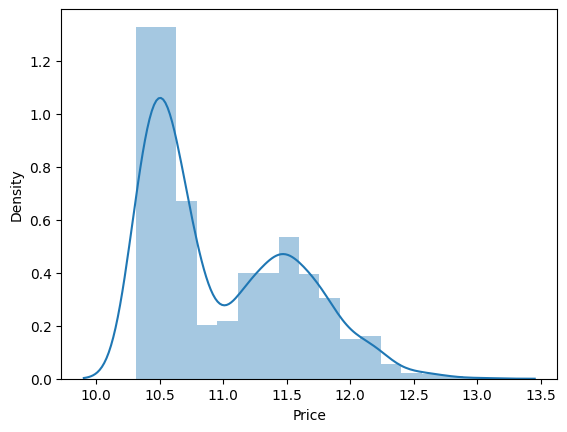

In [52]:
sns.distplot(np.log(df['Price']))

In [53]:
# Save the processed dataframe to CSV
df.to_csv('laptop_processed.csv', index=False)

In [66]:
X = df.drop(columns=['Price'])
y =np.log(df['Price'])

In [69]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.impute import SimpleImputer
from sklearn.metrics import r2_score

# Define columns
num_cols = ['ram','storage','screensize']
cat_cols = ['Variant','company','processor_feature','processor_brand','display_type',
            'graphics_brand','graphics_type']

# Features / Target
X = df[num_cols + cat_cols]
y = df['Price']

# Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Preprocessor: add imputation for missing values
preprocessor = ColumnTransformer([
    ('num', Pipeline([
        ('imputer', SimpleImputer(strategy='mean')),    # fill NaN in numeric with mean
        ('scaler', StandardScaler())
    ]), num_cols),

    ('cat', Pipeline([
        ('imputer', SimpleImputer(strategy='most_frequent')),  # fill NaN in categorical with mode
        ('onehot', OneHotEncoder(handle_unknown='ignore'))
    ]), cat_cols)
])

# Models to compare
models = {
    "Linear Regression": LinearRegression(),
    "Random Forest": RandomForestRegressor(random_state=42, n_estimators=200),
    "XGBoost": XGBRegressor(random_state=42, n_estimators=200, verbosity=0)
}

# Train & evaluate
results = {}
for name, model in models.items():
    pipe = Pipeline([
        ('preprocessor', preprocessor),
        ('model', model)
    ])
    pipe.fit(X_train, y_train)
    preds = pipe.predict(X_test)
    r2 = r2_score(y_test, preds)
    results[name] = round(r2, 4)

print("R2 Scores for different models:")
for k, v in results.items():
    print(f"{k}: {v}")


R2 Scores for different models:
Linear Regression: 0.7609
Random Forest: 0.8904
XGBoost: 0.8514


In [59]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.15,random_state=2)

In [60]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import r2_score,mean_absolute_error

In [61]:
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor,AdaBoostRegressor,ExtraTreesRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor

In [63]:
# Features and target
X = df[['Variant','ram','storage','screensize','company','processor_feature',
        'processor_brand','display_type','graphics_brand','graphics_type']]
y = df['Price']

# Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define numeric and categorical columns
num_cols = ['ram','storage','screensize']
cat_cols = ['Variant','company','processor_feature','processor_brand','display_type',
            'graphics_brand','graphics_type']

# Preprocessing
preprocessor = ColumnTransformer(transformers=[
    ('num', SimpleImputer(strategy='mean'), num_cols),
    ('cat', Pipeline([
        ('imputer', SimpleImputer(strategy='most_frequent')),
        ('onehot', OneHotEncoder(drop='first', handle_unknown='ignore'))
    ]), cat_cols)
])

# Pipeline
pipe = Pipeline([
    ('preprocess', preprocessor),
    ('regressor', LinearRegression())
])

# Fit
pipe.fit(X_train, y_train)

# Predict
y_pred = pipe.predict(X_test)

# Metrics
print('R2 score:', r2_score(y_test, y_pred))
print('MAE:', mean_absolute_error(y_test, y_pred))


R2 score: 0.7686799038373279
MAE: 11354.187008842799


/usr/local/lib/python3.11/dist-packages/sklearn/preprocessing/_encoders.py:246: UserWarning: Found unknown categories in columns [2] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


In [65]:
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor

# Random Forest Pipeline
rf_pipe = Pipeline([
    ('preprocess', preprocessor),
    ('rf', RandomForestRegressor(n_estimators=200, random_state=42))
])

rf_pipe.fit(X_train, y_train)
rf_pred = rf_pipe.predict(X_test)

print('Random Forest:')
print('R2 score:', r2_score(y_test, rf_pred))
print('MAE:', mean_absolute_error(y_test, rf_pred))


# XGBoost Pipeline
xgb_pipe = Pipeline([
    ('preprocess', preprocessor),
    ('xgb', XGBRegressor(n_estimators=200, learning_rate=0.1, max_depth=6, random_state=42, verbosity=0))
])

xgb_pipe.fit(X_train, y_train)
xgb_pred = xgb_pipe.predict(X_test)

print('\nXGBoost:')
print('R2 score:', r2_score(y_test, xgb_pred))
print('MAE:', mean_absolute_error(y_test, xgb_pred))


/usr/local/lib/python3.11/dist-packages/sklearn/preprocessing/_encoders.py:246: UserWarning: Found unknown categories in columns [2] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


Random Forest:
R2 score: 0.8865889480858521
MAE: 8074.731526252506

XGBoost:
R2 score: 0.8409361839294434
MAE: 8586.5810546875


/usr/local/lib/python3.11/dist-packages/sklearn/preprocessing/_encoders.py:246: UserWarning: Found unknown categories in columns [2] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
